# Linear Regression
Linear regression is one of the simplest supervised learningalgorithms in our toolkit. If you have ever taken an introductorystatistics course in college, likely the final topic you covered waslinear regression. In fact, it is so simple that it is sometimes notconsidered machine learning at all! Whatever you believe, the fact isthat linear regression—and its extensions—continues to be a commonand useful method of making predictions when the target vector is aquantitative value (e.g., home price, age).<br>


# Best fitting line
Linear regression assumes that the relationship between the featuresand the target vector is approximately linear. That is, the effect (alsocalled coefficient, weight, or parameter) of the features on the targetvector is constant. In our solution, for the sake of explanation wehave trained our model using only two features. This means ourlinear model will be:
<img src="Images/linear_regression.png">
where ŷ is our target, x is the data for a single feature, ˆβ<sub>1</sub> and ˆβ<sub>2</sub> are the coefficients identified by fitting the model, and ε is the error.After we have fit our model, we can view the value of eachparameter. For example, ˆβ<sub>0</sub>, also called the bias or intercept, can beviewed using intercept_:<br>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
x = load_boston()['data'][:,0:2]
y = load_boston()['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression

# Create linear regression
regression=LinearRegression()

# Fit the linear regression

model=regression.fit(x_train,y_train)


In [99]:
# we can see the bias or variance by intercept__
print(model.intercept_)

# we can see our B1, B2, B3, ... , Bn by using coef__
model.coef_

21.672855487846665


array([-0.31573497,  0.12981678])

In [100]:
pred = model.predict(x_test)

In [101]:
pred

array([25.93951016, 29.45495725, 32.04688206, 26.85637359, 21.20041494,
       19.91071653, 21.21082157, 21.39461405, 24.24056974, 21.55220053,
       21.63144053, 21.47597579, 21.65110766, 26.83520356, 26.84618166,
       24.10496473, 21.61227858, 21.64662423, 21.65068458, 21.2264536 ,
       21.2865285 , 19.68749191, 21.62792324, 21.56516145, 27.48725537,
       21.66203525, 23.24992577, 19.2252054 , 24.24983972, 15.73356501,
       32.04346581, 21.5426527 , 32.70137766, 21.62253996, 20.13478101,
       21.58811854, 17.35420103, 32.03329914, 21.42329541, 21.66044079,
       21.57870648, 21.4787732 , 18.6431543 , 29.45731895, 21.60046693,
       28.80474933, 20.46143093, 17.14720518, 24.25789412, 21.43597217,
       20.96486403, 19.81884397, 21.50330581, 21.64700627, 21.63825409,
       24.0986595 , 21.62714969, 20.32741091, 20.8407423 , 15.48157693,
       21.29620262, 21.63131108, 21.19324776, 24.07610655, 21.65181491,
       21.50093148, 21.64392154, 15.33135024, 21.64125673, 24.41

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

6.410477716659145
92.53307570930329


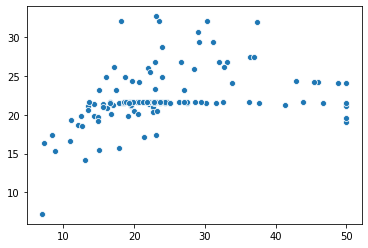

In [103]:
sns.scatterplot(y_test,pred)

The major advantage of linear regression is its interpretability, inlarge part because the coefficients of the model are the effect of aone-unit change on the target vector. For example, the first feature inour solution is the number of crimes per resident. Our model’scoefficient of this feature was ~–1.25, meaning that if we multiplythis coefficient by 1,000 (since the target vector is the house price inthousands of dollars), we have the change in house price for eachadditional one crime per capita:

In [104]:
model.coef_[0]

-0.3157349676878392

In the same way we can see the effect of other features. For example, in the following figure "ZN" feature has 0.05757 effect and "INDUS" has -0.016418 effect

In [108]:
effect = pd.DataFrame(model.coef_,index=load_boston()['feature_names'][:2]).reset_index()
effect

,index,0
0,CRIM,-0.315735
1,ZN,0.129817


In [127]:
effect[effect[0]==effect[0].max()]

,index,0
1,ZN,0.129817


In [128]:
effect[effect[0]==effect[0].min()]

,index,0
0,CRIM,-0.315735


# Handling Interactive Effects
Sometimes a feature’s effect on our target variable is at least partiallydependent on another feature. For example, imagine a simple coffee-based example where we have two binary features—the presence ofsugar (sugar) and whether or not we have stirred (stirred)—and we want to predict if the coffee tastes sweet. Just putting sugar in the coffee (sugar=1, stirred=0) won’t make the coffee taste sweet(all the sugar is at the bottom!) and just stirring the coffee without adding sugar (sugar=0, stirred=1) won’t make it sweet either.<br>
Instead it is the interaction of putting sugar in the coffee and stirringthe coffee (sugar=1, stirred=1) that will make a coffee taste sweet. The effects of sugar and stir on sweetness are dependent on each other. In this case we say there is an interaction effect between the features sugar and stirred.<br>
We can account for interaction effects by including a new feature comprising the product of corresponding values from the interacting features.<br>
<img src="Images/linear_regression-2.png">
where x1 and x2 are the values of the sugar and stirred,respectively, and x1x2 represents the interaction between the two.<br>

In our solution, we used a dataset containing only two features. To create an interaction term, we simply multiply those two values together for every observation:

In [112]:
interaction_term = np.multiply(x[:,0],x[:,1])
interaction_term[0]

0.11376

However, while often we will have a substantive reason for believingthere is an interaction between two features, sometimes we will not.In those cases it can be useful to use scikit-learn’s PolynomialFeatures to create interaction terms for allcombinations of features. We can then use model selection strategies to identify the combination of features and interaction terms thatproduce the best model.<br><br>
To create interaction terms using PolynomialFeatures, there are three important parameters we must set. Most important,interaction_only=True tells PolynomialFeatures to only return interaction terms. By default, PolynomialFeatures will add a feature containing ones called a bias. We can prevent thatwith include_bias=False. Finally, the degree parameter determines the maximum number of features to create interaction terms from (in case we wanted to create an interaction term that is the combination of three features).

In [138]:
from sklearn.preprocessing import PolynomialFeatures 

interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)

x = interaction.fit_transform(x)

We can see the output of PolynomialFeatures from our solution by checking to see if the first observation’s feature values and interaction term value match our manually calculated version:

In [139]:
x[0][2]==interaction_term[0]

False

And now we can perform our linear model on the features_interaction

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)

regression=LinearRegression()

model=regression.fit(x_train,y_train)

pred = model.predict(x_test)

print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))